## Exercise 2: Predicting House Prices with Non - Linear Regression
In this exercise, you will build a simple machine-learning model to predict house prices based on given features.
    

<class 'sklearn.utils._bunch.Bunch'>
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1

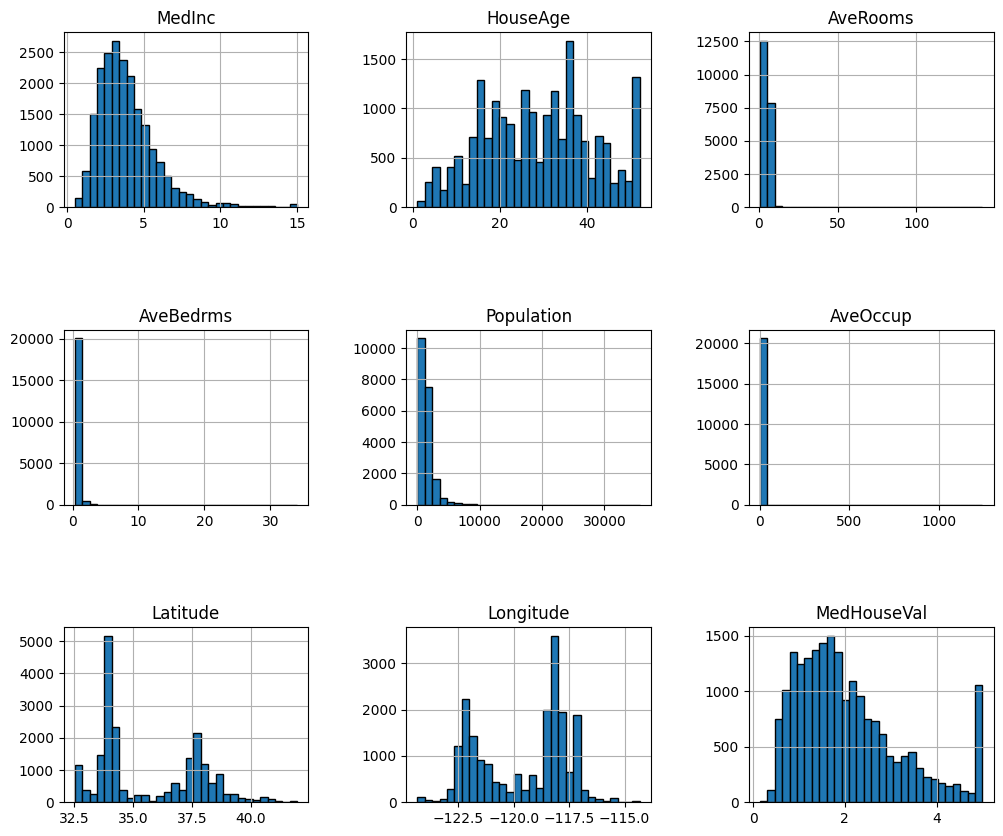

In [26]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

california_housing = fetch_california_housing(as_frame=True)
print(type(california_housing))
print(california_housing.DESCR)
california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Feature Names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
X.shape= (20640, 8)
y.shape= (20640,)


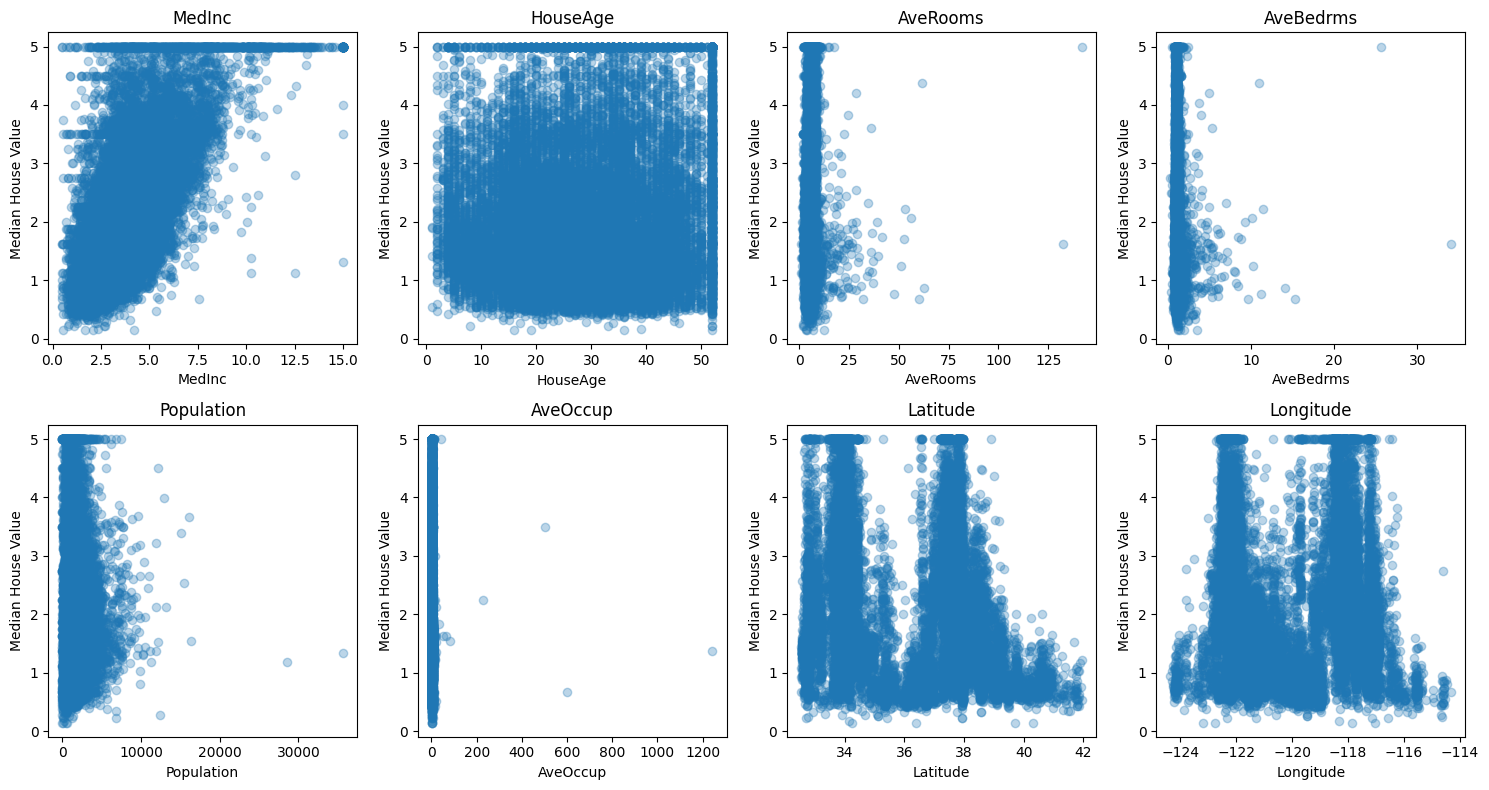


--- Polynomial Regression ---
Polynomial Regression MSE: 0.46430152383011997

--- Decision Tree Regression ---
Decision Tree Regression MSE: 0.5245146178314735


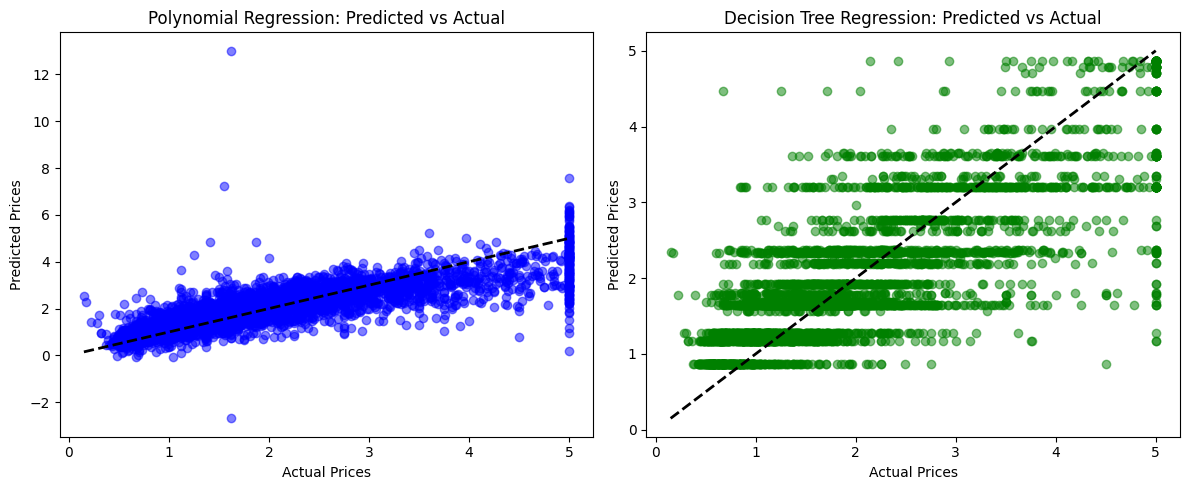


Comparison of Models:
Polynomial Regression MSE: 0.4643
Decision Tree Regression MSE: 0.5245


In [30]:
# Step 1: Load the dataset (as bunch = dictionnary)
data = fetch_california_housing()

# Print the feature names
print("Feature Names:", data.feature_names)

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # Median house value (target)

print('X.shape=',X.shape)
print('y.shape=',y.shape)

# Plot features vs target for a quick overview
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.ravel()

for i, col in enumerate(X.columns):
    axes[i].scatter(X[col], y, alpha=0.3)
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Median House Value')

plt.tight_layout()
plt.show()

# Step 2: Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Polynomial Regression
print("\n--- Polynomial Regression ---")
poly = PolynomialFeatures(degree=2)  # Transform to include polynomial terms
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train_poly, y_train)

y_pred_poly = linear_model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print("Polynomial Regression MSE:", mse_poly)

# Step 5: Decision Tree Regression
print("\n--- Decision Tree Regression ---")
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print("Decision Tree Regression MSE:", mse_tree)

# Step 6: Visualize Predicted vs Actual Prices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Polynomial Regression Plot
axes[0].scatter(y_test, y_pred_poly, alpha=0.5, color="blue")
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
axes[0].set_title("Polynomial Regression: Predicted vs Actual")
axes[0].set_xlabel("Actual Prices")
axes[0].set_ylabel("Predicted Prices")

# Decision Tree Regression Plot
axes[1].scatter(y_test, y_pred_tree, alpha=0.5, color="green")
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
axes[1].set_title("Decision Tree Regression: Predicted vs Actual")
axes[1].set_xlabel("Actual Prices")
axes[1].set_ylabel("Predicted Prices")

plt.tight_layout()
plt.show()

# Compare Results
print("\nComparison of Models:")
print(f"Polynomial Regression MSE: {mse_poly:.4f}")
print(f"Decision Tree Regression MSE: {mse_tree:.4f}")

## Key Additions

1. Feature-Target Relationships:
* The first set of scatter plots gives a quick overview of the relationship between each feature and the target variable.

2. Predicted vs Actual Prices:

* Two side-by-side scatter plots compare the predictions from Polynomial Regression and Decision Tree Regression against the actual prices.

3. Diagonal Line:
* A reference diagonal (y = x) is added in both prediction plots to indicate a perfect prediction.

## Expected Output
1. Feature-Target Relationships: Scatter plots of each feature against house prices. These help you identify which features are strongly correlated with the target.

2. Polynomial Regression MSE and Decision Tree Regression MSE: Printed in the console.

3. Predicted vs Actual Plots:
* Polynomial Regression: The spread of predictions compared to the actual prices.
* Decision Tree Regression: A potentially better fit due to its non-linear nature.